In [1]:
from google.colab import files
uploaded=files.upload()

Saving twitter_training.csv to twitter_training.csv


In [2]:
import pandas as pd

df = pd.read_csv("twitter_training.csv", header=None)

df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# Assign column names
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet']


In [4]:
# Check for missing values in each column
df.isnull().sum()

,0
Tweet_ID,0
Entity,0
Sentiment,0
Tweet,686


In [5]:
# Unique sentiment classes and their counts
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [6]:
df = df[df['Sentiment'].isin(['Positive', 'Negative', 'Neutral'])]

df.reset_index(drop=True, inplace=True)

In [7]:
import re
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def clean_tweet(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r"@\w+", '', text)
        text = re.sub(r"#\w+", '', text)
        text = re.sub(r"[^\w\s]", '', text)
        text = re.sub(r"\d+", '', text)
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    else:
        return ""

In [9]:
df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)

/tmp/ipython-input-10-1304706115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


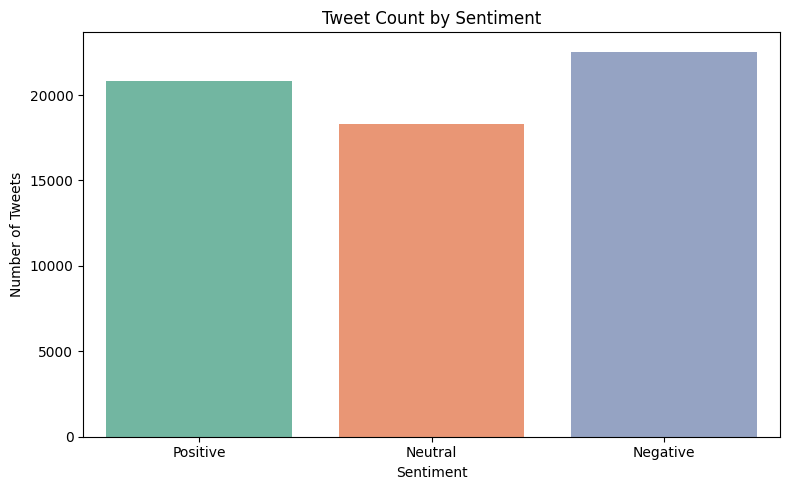

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title("Tweet Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

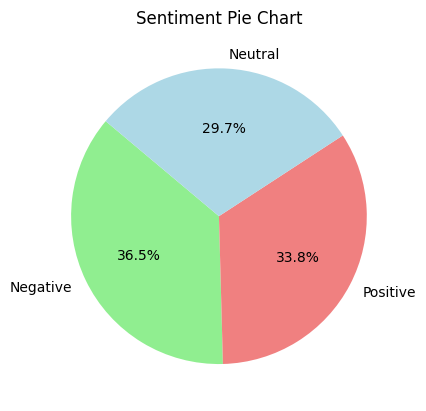

In [11]:
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'], startangle=140)
plt.title('Sentiment Pie Chart')
plt.ylabel('')
plt.show()